**Task 1**

# Code for Task-1 

NOTE: I've included the code as given with the **changes to** the **hidden_size** and **num_epochs**

In [0]:
import numpy as np
import matplotlib.pyplot as plt

class NeuralNetwork():
  def __init__(self, input_size, hidden_size, output_size):
    super(NeuralNetwork, self).__init__()
    self.weights_input_to_hidden = np.random.random((input_size, hidden_size))
    self.weights_hidden_to_output = np.random.random((hidden_size, output_size))

  # For Task 2, change the sigmoid function to tan-h and reLU here
  ## TASK 2 CODE STARTS HERE
  def sigmoid(self, x, deriv = False):
    if deriv:
      return x * (1 - x)
    return 1 / (1 + np.exp(-x))
  ## TASK 2 CODE ENDS HERE

  def train(self, train_x, train_y, num_epochs):
    loss_dict = {}
    for epoch in range(num_epochs):
        # Forward prop
        self.l0 = train_x
        self.l1 = self.sigmoid(np.dot(self.l0, self.weights_input_to_hidden))
        l2 = self.sigmoid(np.dot(self.l1, self.weights_hidden_to_output))

        # Backprop
        # Finding final and hidden layer losses
        loss = train_y - l2
        if epoch % 10 == 0:
          print('Epoch {}/{} \tLoss:{}'.format(epoch+1, num_epochs, np.mean(np.abs(loss))))
          #plt.plot(epoch+1,np.mean(loss))
        
        l2_delta = loss * self.sigmoid(l2, deriv = True)
        l1_error = l2_delta.dot(self.weights_hidden_to_output.T)
        l1_delta = l1_error * self.sigmoid(self.l1, deriv = True)
        
        # Optimizing weights
        self.weights_hidden_to_output += self.l1.T.dot(l2_delta)
        self.weights_input_to_hidden += self.l0.T.dot(l1_delta)

        # Store loss in a dictionary
        loss_dict[epoch] = np.abs(np.mean(loss))
    return loss_dict
        
  def test(self, test_x):
    self.l0 = test_x
    self.l1 = self.sigmoid(np.dot(self.l0, self.weights_input_to_hidden))
    output = self.sigmoid(np.dot(self.l1, self.weights_hidden_to_output))
    if output < 0.5:
      return 0
    return output

In [0]:
# Training Set
arr_x = np.array([[0,0,0],
                [1,1,1],
                [1,0,0],
                [0,0,1],
                [1,1,0],
                [1,0,1]])
arr_y = np.array([[0],
                 [1],
                 [1],
                 [1],
                 [0],
                 [0]])

Epoch 1/50 	Loss:0.49882085850543983


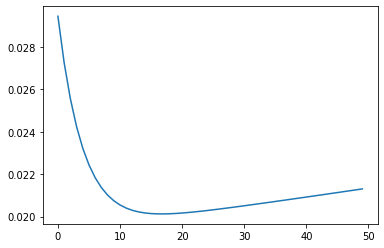

In [23]:
nn = NeuralNetwork(input_size=3, hidden_size = 1, output_size = 1)
loss = nn.train(train_x = arr_x, train_y = arr_y, num_epochs = 50)
plt.plot(list(loss.keys()),list(loss.values()))

# Code for Task-2

TAN-H

In [0]:
class NeuralNetwork():
  def __init__(self, input_size, hidden_size, output_size):
    super(NeuralNetwork, self).__init__()
    self.weights_input_to_hidden = np.random.random((input_size, hidden_size))
    self.weights_hidden_to_output = np.random.random((hidden_size, output_size))

  # For Task 2, change the tanh function to tan-h and reLU here
  ## TASK 2 CODE STARTS HERE
  # TanH Function
  def tanh(self, x, deriv = False):
    f = np.tanh(x)
    if deriv:
      return 1 - f**2
    return f
  ## TASK 2 CODE ENDS HERE

  def train(self, train_x, train_y, num_epochs):
    loss_dict = {}
    for epoch in range(num_epochs):
        # Forward prop
        self.l0 = train_x
        self.l1 = self.tanh(np.dot(self.l0, self.weights_input_to_hidden))
        l2 = self.tanh(np.dot(self.l1, self.weights_hidden_to_output))

        # Backprop
        # Finding final and hidden layer losses
        loss = train_y - l2
        if epoch % 1000 == 0:
          print('Epoch {}/{} \tLoss:{}'.format(epoch+1, num_epochs, np.mean(np.abs(loss))))
          #plt.plot(epoch+1,np.mean(loss))
        
        l2_delta = loss * self.tanh(l2, deriv = True)
        l1_error = l2_delta.dot(self.weights_hidden_to_output.T)
        l1_delta = l1_error * self.tanh(self.l1, deriv = True)
        
        # Optimizing weights
        self.weights_hidden_to_output += self.l1.T.dot(l2_delta)
        self.weights_input_to_hidden += self.l0.T.dot(l1_delta)

        # Store loss in a dictionary
        loss_dict[epoch] = np.abs(np.mean(loss))
    return loss_dict
        
  def test(self, test_x):
    self.l0 = test_x
    self.l1 = self.tanh(np.dot(self.l0, self.weights_input_to_hidden))
    output = self.tanh(np.dot(self.l1, self.weights_hidden_to_output))
    if output < 0.5:
      return 0
    return output

Epoch 1/5000 	Loss:1.948601348467923
Epoch 1001/5000 	Loss:0.5
Epoch 2001/5000 	Loss:0.5
Epoch 3001/5000 	Loss:0.5
Epoch 4001/5000 	Loss:0.5


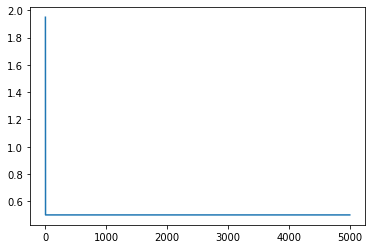

In [43]:
nn = NeuralNetwork(input_size=3, hidden_size = 5, output_size = 1)
loss = nn.train(train_x = arr_x, train_y = arr_y, num_epochs = 5000)
plt.plot(list(loss.keys()),list(loss.values()))

RELU

In [0]:
class NeuralNetwork():
  def __init__(self, input_size, hidden_size, output_size):
    super(NeuralNetwork, self).__init__()
    self.weights_input_to_hidden = np.random.random((input_size, hidden_size))
    self.weights_hidden_to_output = np.random.random((hidden_size, output_size))

  ## TASK 2 CODE STARTS HERE
  # Rectified Linear Unit (ReLU) Function
  def relu(self, x, deriv = False):
    if deriv:
      if x.any() > 0:
        return 1
      else:
        return 0
    else:
      return x * (x > 0)
  ## TASK 2 CODE ENDS HERE

  def train(self, train_x, train_y, num_epochs):
    loss_dict = {}
    for epoch in range(num_epochs):
        # Forward prop
        self.l0 = train_x
        self.l1 = self.relu(np.dot(self.l0, self.weights_input_to_hidden))
        l2 = self.relu(np.dot(self.l1, self.weights_hidden_to_output))

        # Backprop
        # Finding final and hidden layer losses
        loss = train_y - l2
        if epoch % 1000 == 0:
          print('Epoch {}/{} \tLoss:{}'.format(epoch+1, num_epochs, np.mean(np.abs(loss))))
          #plt.plot(epoch+1,np.mean(loss))
        
        l2_delta = loss * self.relu(l2, deriv = True)
        l1_error = l2_delta.dot(self.weights_hidden_to_output.T)
        l1_delta = l1_error * self.relu(self.l1, deriv = True)
        
        # Optimizing weights
        self.weights_hidden_to_output += self.l1.T.dot(l2_delta)
        self.weights_input_to_hidden += self.l0.T.dot(l1_delta)

        # Store loss in a dictionary
        loss_dict[epoch] = np.abs(np.mean(loss))
    return loss_dict
        
  def test(self, test_x):
    self.l0 = test_x
    self.l1 = self.relu(np.dot(self.l0, self.weights_input_to_hidden))
    output = self.relu(np.dot(self.l1, self.weights_hidden_to_output))
    if output < 0.5:
      return 0
    return output

Epoch 1/5000 	Loss:0.7543684851153318
Epoch 1001/5000 	Loss:0.5
Epoch 2001/5000 	Loss:0.5
Epoch 3001/5000 	Loss:0.5
Epoch 4001/5000 	Loss:0.5


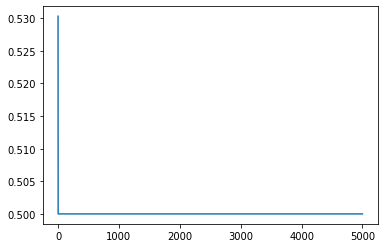

In [42]:
nn = NeuralNetwork(input_size=3, hidden_size = 5, output_size = 1)
loss = nn.train(train_x = arr_x, train_y = arr_y, num_epochs = 5000)
plt.plot(list(loss.keys()),list(loss.values()))

# Code for Task-3

F = !((A.B)+C) + D

In [0]:
# Training Set for Task 3
## TASK 3 CODE STARTS HERE
#!((A.B)+C) + D
arr_x = np.array([[0,0,0,0],
                [1,1,1,0],
                [1,0,0,1],
                [0,0,1,0],
                [1,1,0,1],
                [1,0,1,0],
                [1,1,0,0],
                [0,0,0,1],
                [1,0,0,0]])
arr_y = np.array([[1],
                 [0],
                 [1],
                 [0],
                 [1],
                 [0],
                 [0],
                 [1],
                 [1]])

Epoch 1/5000 	Loss:0.49553458378818926
Epoch 1001/5000 	Loss:0.01936312164443308
Epoch 2001/5000 	Loss:0.01326143574428019
Epoch 3001/5000 	Loss:0.010681431198586824
Epoch 4001/5000 	Loss:0.009175874855714096


array([0.98030148])

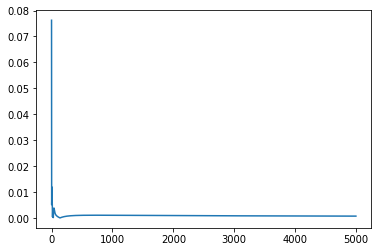

In [51]:
#changing input size to 4
nn_task3 = NeuralNetwork(input_size=4, hidden_size = 2, output_size = 1)
loss = nn_task3.train(train_x = arr_x, train_y = arr_y, num_epochs = 5000)
plt.plot(list(loss.keys()),list(loss.values()))
nn_task3.test(np.array([0,1,0,1]))

F = !(A.B) xor !(C.D)

In [0]:
# Training Set for Task 3
## TASK 3 CODE STARTS HERE
#F = !(A.B) xor !(C.D)
arr_x = np.array([[0,0,0,0],
                [1,1,1,0],
                [1,0,0,1],
                [0,0,1,0],
                [1,1,0,1],
                [1,0,1,0],
                [1,1,0,0],
                [0,0,0,1],
                [1,0,0,0]])
arr_y = np.array([[0],
                 [1],
                 [0],
                 [0],
                 [1],
                 [0],
                 [1],
                 [0],
                 [0]])

Epoch 1/5000 	Loss:0.5610370227580124
Epoch 1001/5000 	Loss:0.1781863513821118
Epoch 2001/5000 	Loss:0.17444071186940546
Epoch 3001/5000 	Loss:0.1728818208009866
Epoch 4001/5000 	Loss:0.17197934978998453


0

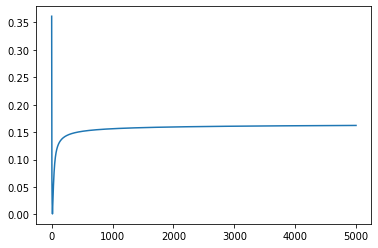

In [53]:
#changing input size to 4
nn_task3 = NeuralNetwork(input_size=4, hidden_size = 2, output_size = 1)
loss = nn_task3.train(train_x = arr_x, train_y = arr_y, num_epochs = 5000)
plt.plot(list(loss.keys()),list(loss.values()))
nn_task3.test(np.array([0,1,0,1]))